<a href="https://colab.research.google.com/github/aas-git-hub/movie-list-app/blob/master/Copy_of_Day_7_Threads.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Basic Lifecycle of a Thread**
1.   New: The thread is created but not yet started.
2.   Runnable: The thread is ready to run and may be running.
3.   Blocked: The thread is waiting for resources or events.
4.   Terminated: The thread has finished execution.


**Multithreading** is defined as the ability of a processor to execute multiple threads concurrently.
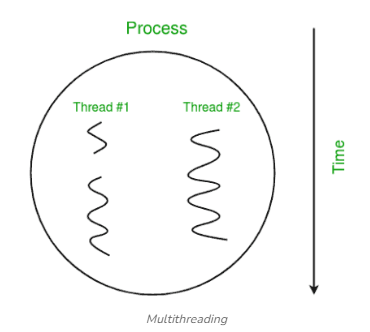



# Introduction to Threads
**What is a Process in Python?**

In computing, a process is an instance of a computer program that is being executed.

**What is a Thread?**

A **thread** is an entity within a process that can be scheduled for execution.Also, it is the smallest unit of processing that can be scheduled by an operating system. They enable concurrent execution within a single process.

In simple words, a thread is a sequence of such instructions within a program that can be executed independently of other code.

**Threads vs. Processes**


*   **Processes** are independent, have their own memory space, and communicate via inter-process communication (IPC).
*   **Threads**, on the other hand, share the same memory space and can communicate more efficiently, but they also need to be carefully managed to avoid conflicts.








# 1. Starting Threads in Python

**Threading Module**: Python provides the `threading` module for creating and managing threads. The `Thread` class allows you to define a new thread, specifying a target function to run.

**Step 1**: Import Module
First, import the threading module.

In [ ]:
import threading

**Step 2** Create a Thread

To create a new thread, we instantiate an object of the Thread class, providing target and args as parameters. The target specifies the function that the thread will execute, while args provides the arguments to pass to that function.

In [ ]:
t1 = threading.Thread(target, args)
t2 = threading.Thread(target, args)

**Step 3** Start a Thread

To start a thread, we use the start() method of the Thread class.

In [ ]:
t1.start()
t2.start()

**Step 4** End the thread Execution

When threads start, the current program (which acts as the main thread) continues running. To pause the current program until a thread completes, we use the join() method:


In [ ]:
t1.join()
t2.join()

As a result, the current program waits for t1 to finish first, then t2. Once both threads have completed, the remaining statements in the current program are executed.

In [ ]:
def print_cube(num):
    print("Cube: {}" .format(num * num * num))


def print_square(num):
    print("Square: {}" .format(num * num))


t1 = threading.Thread(target=print_square, args=(10,))
t2 = threading.Thread(target=print_cube, args=(10,))

t1.start()
t2.start()

t1.join()
t2.join()

print("Done!")

Square: 100Cube: 1000

Done!


**Explanation**: This code demonstrates how to use Python’s threading module to run two tasks concurrently. The main program initiates two threads, t1 and t2 , each responsible for executing a specific task. The threads run in parallel, and the code provides information about the process ID and thread names. The os module is used to access the process ID, and the ‘ threading' module is used to manage threads and their execution.

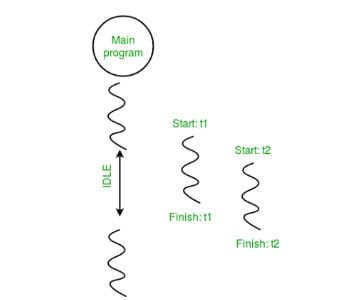

In [ ]:
import threading
import time

# Define a function that simulates a task
def print_numbers():
    for i in range(5):
        print(f"Number: {i}")
        time.sleep(1)  # Simulate a delay

# Create a thread to run the print_numbers function
number_thread = threading.Thread(target=print_numbers)

# Start the thread
number_thread.start()

# Main thread continues to run while number_thread is executing
print("Main thread is doing other work...")

# Wait for the number_thread to complete
number_thread.join()  # Ensure this thread has finished before continuing

print("Thread has finished execution.")


Number: 0Main thread is doing other work...

Number: 1
Number: 2
Number: 3
Number: 4
Thread has finished execution.


# 3. ThreadPoolExecutor
A **thread pool** is a collection of threads that are created in advance and can be reused to execute multiple tasks. The `ThreadPoolExecutor` class from the `concurrent.futures` module is used to manage a pool of threads.

**How to use?**

*   You can create a thread pool by instantiating a `ThreadPoolExecutor` object with a specified number of worker threads (e.g., `max_workers`).
*   Use the `submit()` method to add tasks to the pool. This method returns a Future object representing the execution of the task, which can be used to retrieve the result once it’s completed.


In [ ]:
import concurrent.futures

def worker():
    print("Worker thread running")

pool = concurrent.futures.ThreadPoolExecutor(max_workers=2)

pool.submit(worker)
pool.submit(worker)

pool.shutdown(wait=True)

print("Main thread continuing to run")

This code uses a thread pool created with concurrent.futures.ThreadPoolExecutor to run two worker tasks concurrently. The main thread waits for the worker threads to finish using pool.shutdown(wait=True) . This allows for efficient parallel processing of tasks in a multi-threaded environment.

In the below example, we define a function task(n) that simulates a time-consuming operation. We create a ThreadPoolExecutor with a maximum of three worker threads and submit five tasks. After all tasks are submitted, we retrieve and print their results. Let's try to run the scripts and oberserve the results.

In [ ]:
from concurrent.futures import ThreadPoolExecutor
import time

# Function to simulate a time-consuming task
def task(n):
    print(f"Task {n} starting")
    time.sleep(2)  # Simulating a task taking some time
    print(f"Task {n} completed")
    return n * 2  # Return some result

# Create a ThreadPoolExecutor with a maximum of 3 threads
with ThreadPoolExecutor(max_workers=3) as executor:
    # Submit multiple tasks to the executor
    futures = [executor.submit(task, i) for i in range(5)]

# Retrieve results from the completed tasks
for future in futures:
    print(f"Result: {future.result()}")  # Get the result of the task


Task 0 starting
Task 1 starting
Task 2 starting
Task 0 completedTask 1 completed
Task 3 starting

Task 4 starting
Task 2 completed
Task 3 completedTask 4 completed

Result: 0
Result: 2
Result: 4
Result: 6
Result: 8


# 3. Race Conditions

**What is a Race Condition?**

A **race condition** occurs when multiple threads access shared data and try to change it at the same time, leading to inconsistent or unexpected results. This is particularly problematic when the operations on shared data are not atomic (i.e., they can be interrupted).



**Real-Time Examples of Race Conditions**

Imagine Sam and his wife both have access to the same bank account. They both try to withdraw $500 at the same time from different ATMs. The system checks the balance and sees there’s enough money for both withdrawals. Without proper synchronization, the system might allow both transactions to go through, even if the balance is only enough for one, leaving the account overdrawn.

Let create a simple example where multiple threads increment a shared variable without synchronization. This will lead to incorrect results due to race conditions.

In [ ]:
import threading
import time

# Shared counter variable
counter = 0

# Function to increment the counter multiple times
def increment_counter():
    global counter
    for _ in range(10000):  # Increased the number of increments
        # Increment without synchronization
        current_value = counter
        # Simulate some processing time
        time.sleep(0.0001)  # Short delay to increase race conditions
        counter = current_value + 1

# Create multiple threads that will increment the counter
threads = [threading.Thread(target=increment_counter) for _ in range(10)]  # 10 threads

# Start all threads
for thread in threads:
    thread.start()

# Wait for all threads to complete
for thread in threads:
    thread.join()

# Display the final result
print(f"Final counter value (without lock): {counter}")


Final counter value (without lock): 10001


The increment_counter function is designed to increment a shared counter variable 10,000 times, increasing the workload and amplifying the likelihood of encountering a race condition. To further demonstrate this phenomenon, a small delay of time.sleep(0.0001) has been added, simulating processing time and allowing threads more opportunity to collide when accessing the shared variable. With 10 threads attempting to increment the counter concurrently, this setup creates a perfect environment for race conditions to occur.

In [ ]:
import threading
import time
import random

# Initial shared balance
balance = 1000

# Lock for synchronization (we'll demonstrate without it first)
balance_lock = threading.Lock()

def deposit(amount):
    global balance
    current_balance = balance  # Read balance
    time.sleep(random.uniform(0.001, 0.01))  # Simulate processing time
    balance = current_balance + amount  # Write new balance

def withdraw(amount):
    global balance
    current_balance = balance  # Read balance
    time.sleep(random.uniform(0.001, 0.01))  # Simulate processing time
    balance = current_balance - amount  # Write new balance

# Worker function that performs random deposits and withdrawals
def transaction_worker():
    for _ in range(100):
        if random.choice([True, False]):
            deposit(random.randint(1, 100))
        else:
            withdraw(random.randint(1, 100))

# Create multiple threads to perform transactions
threads = [threading.Thread(target=transaction_worker) for _ in range(5)]

# Start all threads
for thread in threads:
    thread.start()

# Wait for all threads to complete
for thread in threads:
    thread.join()

print(f"Final balance (without lock): {balance}")


Final balance (without lock): 1015


In this example, we have a shared variable counter that is incremented by multiple threads. Since there are no locks or synchronization mechanisms in place, the final value of counter can be inconsistent. Let's run this code and observe the output. You might notice that it doesn't always yield the expected result of 200,000 due to race conditions.

# 4. Common Threading Tools in Python
In multi-threaded applications, threads often need to share resources or wait for specific events to happen. Python provides several synchronization tools in the threading module to manage these needs, including:
*   Mutex Lock: For exclusive access to shared resources.
*   Semaphore: For controlling access to a limited resource.
*   Condition: For complex wait-and-notify scenarios.
*   Event: For signaling between threads.



### 1. threading.Lock (Mutex Lock)

A **Lock** allows only one thread to access a shared resource at a time, preventing race conditions where threads simultaneously modify shared data, potentially leading to inconsistent or incorrect results. `acquire()` and `release()` are the primary methods for working with `Lock` objects.


**`acquire()`: Locking the Shared Resource**
The `acquire()` method is used by a thread to request exclusive access to a shared resource. Here’s how it works:
*   When a thread calls acquire(), it waits until the lock is free.
*   If another thread already has the lock, the calling thread will wait (or "block") until that thread releases it.
*   Once the lock is free, the calling thread successfully acquires the lock, allowing it to proceed with its operations on the shared resource.

**`release()`: Releasing the Lock**
Once a thread completes its work in the critical section, it should call `release()` to give up control of the lock. This allows other threads that are waiting on `acquire()` to proceed.
*   Failing to release the lock will cause other threads to be blocked indefinitely. It's called **deadlock**.
*   The `release()` method must only be called by the thread that holds the lock.





Syntax:


```
lock.acquire()
# Critical section where the thread has exclusive access
lock.release()
```



In [ ]:
import threading

# A simple lock
lock = threading.Lock()

def critical_section():
    # Attempt to acquire the lock
    lock.acquire()
    try:
        # Critical section of code
        print("Lock acquired by", threading.current_thread().name)
        # Simulated processing time
    finally:
        # Ensure the lock is always released
        lock.release()
        print("Lock released by", threading.current_thread().name)

critical_section()


Lock acquired by MainThread


In this example, each thread that enters critical_section() must acquire the lock first. Only one thread at a time can print the message because of the lock.

In **best practices**, we use a **`try-finally`** block to ensure that the lock is always released, even if an error occurs within the try block. This way, the finally block will execute regardless of any exceptions, guaranteeing that the lock is released properly.

Using **`with counter_lock:`** Syntax

We can simplify this with `with counter_lock:`, which handles lock acquisition and release automatically, providing cleaner and safer code.

In [ ]:
import threading

# A simple lock
lock = threading.Lock()

def critical_section():
    # Attempt to acquire the lock
    with lock:
        # Critical section of code
        print("Lock acquired by", threading.current_thread().name)
        # Simulated processing time

critical_section()

Lock acquired by MainThread


**Exercise**: What's the difference between this example and the previous one?

In [ ]:
import threading
import time

# Shared counter variable
counter = 0
counter_lock = threading.Lock()

def increment():
    global counter
    for _ in range(1000):
        with counter_lock:
            current_value = counter
            time.sleep(0.0001)  # Small delay to increase collision probability
            counter = current_value + 1

threads = [threading.Thread(target=increment) for _ in range(10)]

# Start all threads
for thread in threads:
    thread.start()
for thread in threads:
    thread.join()

print(f"Final counter value: {counter}")


Final counter value: 10000


### 2. threading.Semaphore

 A **`Semaphore`** controls access to a resource that has a limited capacity (e.g., a pool of connections). Unlike a `Lock`, which restricts access to one thread, a **`Semaphore`** can allow multiple threads to access a resource up to a specified limit.


**Key points**
*   A `Semaphore` initializes with a specific number of permits, allowing that many threads to access the resource concurrently.
*   When a thread acquires a permit, the counter decreases. If the counter is zero, additional threads will block until a permit is released.
*   When a thread releases a permit, the counter increases, allowing another waiting thread to proceed.



In [ ]:
import threading
import time

# Create a semaphore with 2 permits (only 2 threads can use the printer at the same time)
printer_semaphore = threading.Semaphore(2)

def use_printer(thread_id):
    print(f"Thread {thread_id} is trying to access the printer.")

    # Acquire the semaphore
    printer_semaphore.acquire()
    try:
        print(f"Thread {thread_id} has acquired the printer.")
        # Simulate printing time
        time.sleep(2)
        print(f"Thread {thread_id} is done using the printer.")
    finally:
        # Always release the semaphore, even if an error occurs
        printer_semaphore.release()
        print(f"Thread {thread_id} has released the printer.")

# Creating and starting threads
threads = []
for i in range(5):
    thread = threading.Thread(target=use_printer, args=(i,))
    threads.append(thread)
    thread.start()

# Wait for all threads to complete
for thread in threads:
    thread.join()

print("All threads have finished.")
